# Simple Visualizations with Pandas- A Football Example

This tutorial article details how the Python Pandas library can be used to explore a data-set efficiently. Specifically, this example will use the data-set, International football results from 1872 to 2019, which is available from the [Kaggle website](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017). Chiefly, this tutorial will explore simple visualizations and how they can be filtered to permit more fined-grained exploration.

Further to this, this tutorial is aimed at showcasing how Pandas can be used to answer data science related-questions.<br>
**Source:** https://towardsdatascience.com/simple-football-data-set-exploration-with-pandas-60a2bc56bd5a

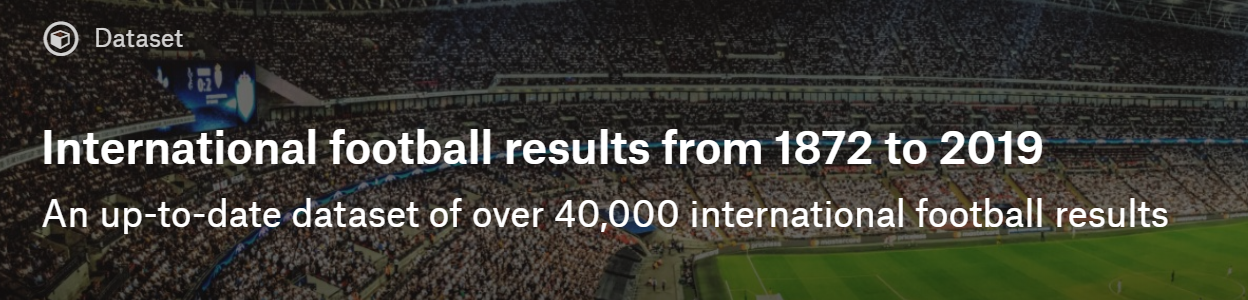
The Data-set is available by following the [link attached](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017), and has records for more than 40 thousand international football results.

## Plot the number of International Matches that took place each year?

To begin, it is necessary to import the Pandas library for data-analysis, in addition to the matplotlib library to permit exploratory data visualizations. I read in the CSV file which is saved in my local directory, and save it to a Dataframe named results. Following this I look at the first 5 records of the results Dataframe, by using the head method. Each row in the Dataframe represents a single International Football match. To help familiarize myself with the data-set, I also look at the datatypes of the columns.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
results = pd.read_csv('../Data/International-Football.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
results.shape

(41540, 9)

In [8]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41540 entries, 0 to 41539
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41540 non-null  object
 1   home_team   41540 non-null  object
 2   away_team   41540 non-null  object
 3   home_score  41540 non-null  int64 
 4   away_score  41540 non-null  int64 
 5   tournament  41540 non-null  object
 6   city        41540 non-null  object
 7   country     41540 non-null  object
 8   neutral     41540 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


To calculate and visualize the number of Matches that took place each year, a good place to start would be to look at the date column as it has the date of each match. As shown previously the date column has an object datatype. To conveniently extract the years from this date column, simply use the pd.to_datetime method on the date series in the results dataframe, and create a new column. Here the new column I have created is called ‘date_time’ and now has a datetime datatype.

In [10]:
pd.to_datetime(results.date).head()

0   1872-11-30
1   1873-03-08
2   1874-03-07
3   1875-03-06
4   1876-03-04
Name: date, dtype: datetime64[ns]

In [11]:
results['date_time'] = pd.to_datetime(results.date)

In [12]:
results.dtypes

date                  object
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
date_time     datetime64[ns]
dtype: object

Through the use of the ```‘dt’``` namespace, convenient attributes such as year can be extracted, and the value_counts method can be applied. In order to plot, the index (the years shown on the left hand side) must be sorted.

In [15]:
results.date_time.dt.year.value_counts().head()

2019    1133
2008    1091
2011    1081
2004    1064
2000    1026
Name: date_time, dtype: int64

By simply writing .plot, the plot can now be visualized and the number of international matches is shown.

Although the plot could certainly use some visual enhancements, a simple pandas one-liner is able to convey the number of matches that took place each year!

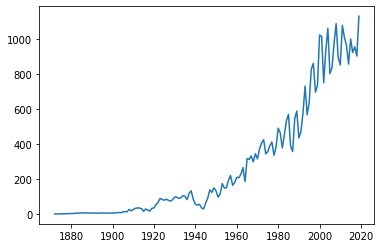

In [16]:
results.date_time.dt.year.value_counts().sort_index().plot()

## Filtering the time-series for more fine grained detail

It would also be insightful to take a look at a narrower range of International matches. The time series column date_time can be filtered using a Pandas one-liner. In the example shown, only International matches from 2014–19 are shown.

Noticeably, there appears to be a dip in International matches in 2019. On close examination, however the last recorded date in the date_time series is in the middle of 2019 as shown using the max() method on the date_time series. This likely explains the sudden and noticeable drop in International matches from 2019.

Tip: We can easily filter a range of dates using multiple conditional statements as shown in the first line which is commented out. Interestingly, we can also select and extract a range of years using the between method, by specifying values for the left= and right= keyword arguments. Note, both values specified are inclusive.

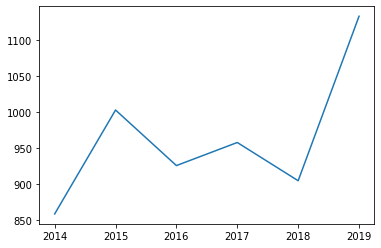

In [28]:
# results.date_time.dt.year[(results.date_time.dt.year > 2005) & (results.date_time.dt.year < 2015)].value_counts().sort_index().plot()
# results.date_time.dt.year[results.date_time.dt.year.between(left=1990, right=2019)].value_counts().sort_index().plot()

results.date_time.dt.year[results.date_time.dt.year >= 2014].value_counts().sort_index().plot()

In [18]:
results.date_time.dt.year[results.date_time.dt.year >= 2014].value_counts().sort_index()

2014     859
2015    1003
2016     926
2017     958
2018     905
2019    1133
Name: date_time, dtype: int64

In [19]:
results.date_time.max()

Timestamp('2019-11-19 00:00:00')

## Which Tournament type is the most exciting?
Use well-represented data from the data-set!

The most exciting International tournament could be defined in many ways, but one way to define it, may be to investigate the goals scored! To begin with deciding which tournament is the most exciting, I create a new column which calculates the number of match goals scored in each International fixture using the code snippet displayed below. To confirm this column has been created, I pull three columns from the results dataframe, namely home_score, away_score and match_goals and randomly sample 5 records from the results dataframe to validate.

In [20]:
results['match_goals'] = results.home_score + results.away_score

In [22]:
results[['home_score','away_score', 'match_goals']].sample(5)

,home_score,away_score,match_goals
7445,1,0,1
9583,4,0,4
26571,4,1,5
28397,2,1,3
32757,2,1,3


For each tournament, I can now use a Pandas groupby to calculate the number of mean match goals and determine the most exciting tournament based on this metric.

However, I must be mindful to have reasonable sample sizes so the results make sense. For this demonstration, I will only only include tournaments, for which there are 100 or more records (international matches) in the Dataframe.

I use the value_counts method on the tournament series in the results dataframe. A new series is returned from this command, where the tournament is the index, and the value is the number of times that particular tournament appears in the dataframe.

In [30]:
# I want to specifically look at tournaments that are well represented in the data
results.tournament.value_counts()

Friendly                                17036
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
World Unity Cup                             4
Dragon Cup                                  4
AFF Championship qualification              2
Atlantic Heritage Cup                       2
Copa América qualification                  2
Name: tournament, Length: 112, dtype: int64

I save this series to a variable called tournament_count, and filter this series to include only 100 or more records for each tournament. I then select the index, and filter the results dataframe using the isin() method call, which returns a new dataframe which now only includes tournaments which are represented 100 or more times in the dataset!

In [31]:
tournament_count = results.tournament.value_counts()

In [36]:
Top_tournaments = tournament_count[tournament_count >= 100].index

In [37]:
Top_tournaments

Index(['Friendly', 'FIFA World Cup qualification', 'UEFA Euro qualification',
       'African Cup of Nations qualification', 'FIFA World Cup',
       'Copa América', 'AFC Asian Cup qualification', 'African Cup of Nations',
       'CECAFA Cup', 'CFU Caribbean Cup qualification', 'British Championship',
       'Merdeka Tournament', 'AFC Asian Cup', 'Island Games', 'Gulf Cup',
       'Gold Cup', 'AFF Championship', 'COSAFA Cup', 'UEFA Euro',
       'Nordic Championship', 'African Nations Championship',
       'CFU Caribbean Cup', 'Amílcar Cabral Cup', 'King's Cup',
       'South Pacific Games', 'UNCAF Cup', 'Korea Cup', 'UEFA Nations League',
       'Confederations Cup', 'SAFF Cup', 'International Cup',
       'CCCF Championship', 'UAFA Cup', 'EAFF Championship',
       'CONCACAF Nations League', 'Windward Islands Tournament',
       'CONIFA World Football Cup', 'Oceania Nations Cup',
       'AFC Challenge Cup'],
      dtype='object')

In [38]:
Represented_tour = results[results.tournament.isin(Top_tournaments)]
Represented_tour.shape

(39344, 11)

I now groupby each tournament in the filtered dataframe, and look at the number of records for each tournament (using count), and sort via the mean number of match goals scored. I look at the tail of the Dataframe as the sorting is in ascending order.

The results reveal that the ‘South Pacific Games’, have on average 5.9 goals per game, and feature 205 times in the filtered dataframe, Represented_tour.

Goals are clearly not the only metric that determines which tournament is the most exciting, and the absence in the data-set of metrics like attempted shots, missed penalties, fouls and all other factors which add value to a game is a definite weakness here.

Tip! To visualize particular tournaments, use the filter method which takes a list.

In [46]:
Represented_tour.groupby('tournament').match_goals.agg(['count', 'mean']).sort_values('mean').tail(10)

,count,mean
tournament,,
CFU Caribbean Cup qualification,606,3.506601
British Championship,505,3.520792
Nordic Championship,283,3.844523
EAFF Championship,116,3.982759
Island Games,350,4.014286
International Cup,127,4.173228
CONIFA World Football Cup,101,4.198020
Oceania Nations Cup,101,4.336634
CCCF Championship,123,4.463415


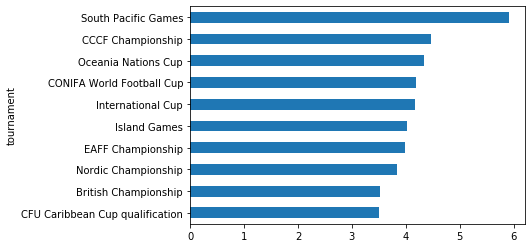

In [44]:
Represented_tour.groupby('tournament').match_goals.mean().sort_values().tail(10).plot(kind='barh')
# tournament_list=['CFU Caribbean Cup qualification','British Championship', 'Oceania Nations Cup','South Pacific Games']
# Represented_tour.groupby('tournament').match_goals.mean().sort_values().filter(tournament_list).plot(kind='barh')

### Filtering the output using the .filter method

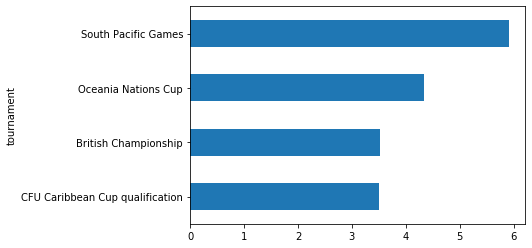

In [47]:
tournament_list=['CFU Caribbean Cup qualification','British Championship', 'Oceania Nations Cup','South Pacific Games']
Represented_tour.groupby('tournament').match_goals.mean().sort_values().filter(tournament_list).plot(kind='barh')

## The Number of Tournament Games in the last 5 years

This question once more showcases how useful Pandas can be in helping to answer data science related questions.

Firstly, I filter the results dataframe to include data from only 2015 onward (the last 5 years). I then group by each year, by extracting the year attribute from the date_time column (which has a datetime datatype). For each year in the filtered dataframe, I then perform a value_counts on the tournament which returns a multi-series index, which I convert into a dataframe using the unstack method.

Finally, to prevent lots of NaNs appearing in the output I fill them with 0. For example, the FIFA World Cup takes place every 4 years, and will therefore only have populated fields once every 4 years. I save this output to a new dataframe called ‘last_5_years’, and pull the columns I specified in my tour list.

Now we can clearly see that there were 64 World Cup matches in 2018, but we can also see some interesting relationships, for example in 2019, 52 matches took place in the African Cup of Nations, a deviation from 2015 and 2017, where 32 matches took place in this tournament.

The associated code used to investigate the Tournaments during the last 5 years is included in the github gist below the image shown.

In [55]:
tour = ['AFC Asian Cup qualification', 'African Cup of Nations', 'Copa América', 'FIFA World Cup qualification', 'Friendly']
results[results.date_time.dt.year >= 2015].groupby(results.date_time.dt.year).tournament.value_counts().unstack().fillna(0)

tournament,ABCS Tournament,AFC Asian Cup,AFC Asian Cup qualification,AFC Challenge Cup,AFF Championship,AFF Championship qualification,African Cup of Nations,African Cup of Nations qualification,African Nations Championship,African Nations Championship qualification,...,Oceania Nations Cup,Oceania Nations Cup qualification,Pacific Games,SAFF Cup,UEFA Euro,UEFA Euro qualification,UEFA Nations League,UNCAF Cup,Windward Islands Tournament,World Unity Cup
date_time,,,,,,,,,,,,,,,,,,,,,
2015,4.0,32.0,0.0,0.0,0.0,0.0,32.0,45.0,40.0,0.0,...,0.0,6.0,0.0,11.0,0.0,165.0,0.0,0.0,3.0,0.0
2016,0.0,0.0,14.0,13.0,24.0,0.0,0.0,87.0,32.0,0.0,...,15.0,0.0,0.0,1.0,51.0,0.0,0.0,0.0,0.0,4.0
2017,0.0,0.0,58.0,0.0,0.0,0.0,32.0,28.0,48.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,0.0
2018,0.0,0.0,13.0,0.0,26.0,2.0,0.0,46.0,32.0,0.0,...,0.0,0.0,0.0,12.0,0.0,0.0,138.0,0.0,0.0,0.0
2019,0.0,51.0,0.0,0.0,0.0,0.0,52.0,68.0,0.0,64.0,...,0.0,0.0,22.0,0.0,0.0,250.0,4.0,0.0,0.0,0.0


In [56]:
last_5_years = results[results.date_time.dt.year >= 2015].groupby(results.date_time.dt.year).\
tournament.value_counts().unstack().fillna(0)

In [57]:
last_5_years[tour]

tournament,AFC Asian Cup qualification,African Cup of Nations,Copa América,FIFA World Cup qualification,Friendly
date_time,,,,,
2015,0.0,32.0,26.0,233.0,278.0
2016,14.0,0.0,32.0,255.0,289.0
2017,58.0,32.0,0.0,310.0,317.0
2018,13.0,0.0,0.0,0.0,436.0
2019,0.0,52.0,26.0,136.0,241.0


This ties to my final question, how many matches have taken place in the Africa Cup of Nations ( AFCON) since its inception?

## Plot the Number of Africa Cup of Nations ( AFCON) Games since the Competition begun

A plot will usefully and clearly present this data. I simply filter the results dataframe by the tournament series where ‘Africa Cup of Nations’ appears, and for each year do a value counts on the tournament and use unstack to return a dataframe. I then pull the ‘Africa Cup of Nations’ column from the afcon dataframe and plot using a bar plot.

N.B I have to extract the ‘Africa Cup of Nations’ column to get a series where I can plot the index (the date in years on the x-axis), and the number of games on the y-axis.

In [60]:
afcon = results[results.tournament == 'African Cup of Nations'].groupby(results.date_time.dt.year).tournament.value_counts().unstack()

afcon.columns
#Index(['African Cup of Nations'], dtype='object', name='tournament')
 
afcon.index
#Int64Index([1957, 1959, 1962, 1963, 1965, 1968, 1970, 1972, 1974, 1976, 1978,
#             1980, 1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996, 1998, 2000,
#             2002, 2004, 2006, 2008, 2010, 2012, 2013, 2015, 2017, 2019],
#            dtype='int64', name='date_time')
 
type(afcon)

pandas.core.frame.DataFrame

In [62]:
afcon.tail(10)

tournament,African Cup of Nations
date_time,
2002,32
2004,32
2006,32
2008,32
2010,29
2012,32
2013,32
2015,32
2017,32


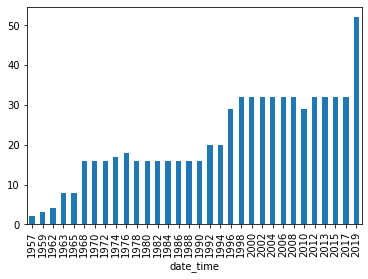

In [64]:
afcon['African Cup of Nations'].plot(kind='bar')

Now the number of games for each Afcon is presented. A quick online search reveals the number of matches has indeed increased in the most recent 2019 Afcon tournament.

# Summary

Pandas can be used intuitively to answer data science questions. The International Football Results from 1872 to 2019 example presented, provides a good use-case to demonstrate how this can be achieved.
Towards Data Science
A Medium publication sharing concepts, ideas, and codes.
Follow
